In [38]:
import iris
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

\begin{equation}
\int_{0}^{t} FA \; dt = \bar{F} \int_{0}^{t} A' \; dt \; + \; \bar{A} \int_{0}^{t} F' \; dt 
\end{equation}

In [16]:
evap_area_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/evspsbl/gn/v20200615/evspsbl-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'
evap_bar_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Ayr/evspsbl/gn/v20191214/evspsbl-pe-region-mean_Ayr_ACCESS-ESM1-5_piControl_r1i1p1f1_gn_010101-100012.nc'
evap_dashed_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/evspsbl/gn/v20200615/evspsbl-pe-region-mean-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'
area_bar_file = '/g/data/r87/dbi599/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/piControl/r1i1p1f1/Ayr/areacella/gn/v20191214/areacella-pe-region-sum_Ayr_ACCESS-ESM1-5_piControl_r1i1p1f1_gn_010101-100012.nc'
area_dashed_file = '/g/data/r87/dbi599/CMIP6/DAMIP/CSIRO/ACCESS-ESM1-5/hist-GHG/r1i1p1f1/Ayr/areacella/gn/v20200615/areacella-pe-region-sum-anomaly_Ayr_ACCESS-ESM1-5_hist-GHG_r1i1p1f1_gn_185001-202012-cumsum.nc'

In [17]:
evap_area_cube = iris.load_cube(evap_area_file, 'water_evapotranspiration_flux')
evap_bar_cube = iris.load_cube(evap_bar_file, 'water_evapotranspiration_flux')
evap_dashed_cube = iris.load_cube(evap_dashed_file, 'water_evapotranspiration_flux')
area_bar_cube = iris.load_cube(area_bar_file, 'cell_area')
area_dashed_cube = iris.load_cube(area_dashed_file, 'cell_area')

In [18]:
def get_time_integral(cube, variable):
    """Get time integral"""

    start = cube[0, 0:5, -1].data
    value = cube[-1, 0:5, -1].data - start
    
    return value


def get_average(cube, variable, ntime):
    """Get average"""
    
    data = cube.data[0:ntime, 0:5, -1]
    average = np.mean(data, axis=0)
    
    return average

In [19]:
evap_area_integral = get_time_integral(evap_area_cube, 'water_evapotranspiration_flux')
evap_dashed_integral = get_time_integral(evap_dashed_cube, 'water_evapotranspiration_flux')
area_dashed_integral = get_time_integral(area_dashed_cube, 'cell_area')

In [20]:
evap_bar = get_average(evap_bar_cube, 'water_evapotranspiration_flux', evap_area_cube.shape[0])
area_bar = get_average(area_bar_cube, 'cell_area', evap_area_cube.shape[0])

In [21]:
evap_area_integral.data

array([-8.97865292e+16,  4.66662497e+17,  1.17329324e+17,  2.89853212e+17,
        6.27760929e+16])

In [22]:
(evap_bar * area_dashed_integral) + (area_bar * evap_dashed_integral) 

masked_array(data=[-8.95757164e+16,  4.64583727e+17,  1.19091390e+17,
                    2.91554073e+17,  6.29280691e+16],
             mask=False,
       fill_value=1e+20)

In [25]:
area_component = evap_bar * area_dashed_integral
intensity_component = area_bar * evap_dashed_integral

In [32]:
data = [['total', 'SH precip', evap_area_integral[0]],
        ['total', 'SH evap', evap_area_integral[1]],
        ['total', 'tropical precip', evap_area_integral[2]],
        ['total', 'NH evap', evap_area_integral[3]],
        ['total', 'NH precip', evap_area_integral[4]],
        ['area', 'SH precip', area_component[0]],
        ['area', 'SH evap', area_component[1]],
        ['area', 'tropical precip', area_component[2]],
        ['area', 'NH evap', area_component[3]],
        ['area', 'NH precip', area_component[4]],
        ['intensity', 'SH precip', intensity_component[0]],
        ['intensity', 'SH evap', intensity_component[1]],
        ['intensity', 'tropical precip', intensity_component[2]],
        ['intensity', 'NH evap', intensity_component[3]],
        ['intensity', 'NH precip', intensity_component[4]],
       ]

In [35]:
df = pd.DataFrame(data, columns = ['component', 'P-E region', 'time-integrated anomaly (kg)']) 

In [36]:
df

,component,P-E region,time-integrated anomaly (kg)
0,total,SH precip,-8.978653e+16
1,total,SH evap,4.666625e+17
2,total,tropical precip,1.173293e+17
3,total,NH evap,2.898532e+17
4,total,NH precip,6.277609e+16
5,area,SH precip,-6.177479e+16
6,area,SH evap,2.475651e+17
7,area,tropical precip,-6.613969e+16
8,area,NH evap,6.413645e+16
9,area,NH precip,-3.762233e+16


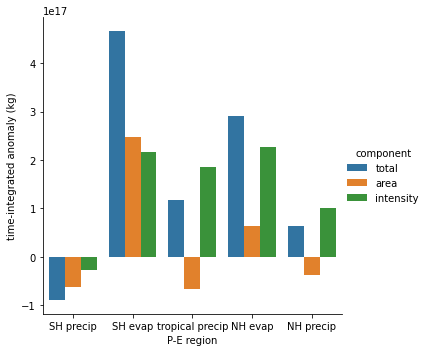

In [48]:
#plt.figure(figsize=[12, 12])
sns.catplot(data=df, kind="bar", x="P-E region", y="time-integrated anomaly (kg)", hue="component")